In [50]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [51]:
# reshape images to 2D array
# normalize values to be between 0 and 1

x_train = x_train.reshape((x_train.shape[0], 28*28))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((x_test.shape[0], 28*28))
x_test = x_test.astype('float32')/255



In [52]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [54]:
print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


In [55]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
# the other axis is blank so any would work
network.add(layers.Dense(10, activation='softmax'))
# dont need to receive input
# it's automatically assigned according to the previous layer

The model has two fully connected layers.

Output = relu(dot(W, input) + b) where W is the Weight coefficients matrix, b is the Bias vector.

'relu' is the activation function.

The last layer returns 10 cells, according to 10 probability scores for 10 digits.

If you are trying to classify between N classes
the last layers should be a Dense one of size N

For single-label, multiclass classification problem, the last layer should always have 'softmax' activation so that it outputs a probability distribution over the N classes.

In [56]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', # this loss function is specialized for categorical outputs
               metrics=['accuracy'])

Loss function: how to measure performance - which quantity will be minimized. A network with multiple output can have multiple loss function

Optimizer: how the network updates itself - a specific variant of schotastic gradient descent. It can only be based on single scalar value.
In multiloss network, all losses are combined into single value. 

Metrics: accuracy - the fraction of images that are correctly classified.

In [57]:
from keras.utils import to_categorical

# categorically ecode data
# explained later
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [58]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [59]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [84]:
length = round(len(x_train)*20/100)

val_x = x_train[:length]
partial_x_train = x_train[length:]

val_y = y_train[:length]
partial_y_train = y_train[length:]

In [92]:
history = network.fit(partial_x_train, partial_y_train, epochs=5, batch_size=128, validation_data = (val_x, val_y))

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 8.7829e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9927
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 1.8515e-05 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9924
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 7.6280e-06 - accuracy: 1.0000 - val_loss: 0.0399 - val_accuracy: 0.9930
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 1.4542e-05 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9919
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 1.6610e-06 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9925


In [93]:
history_dict = history.history

In [94]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


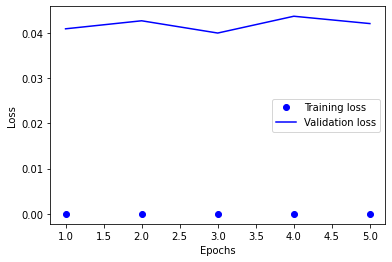

In [95]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

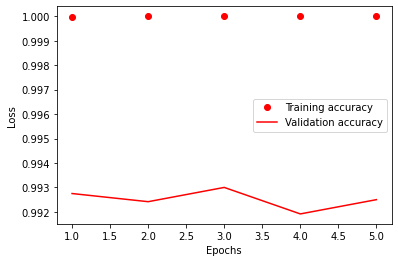

In [96]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [97]:
results = network.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1364 - accuracy: 0.9819


In [98]:
print(results)

[0.13643857836723328, 0.9818999767303467]


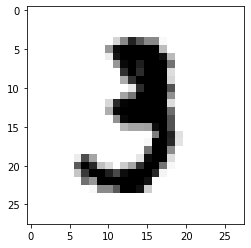

In [72]:
import numpy as np

digit = train_images[10]
digit = np.reshape(digit, (28, 28))

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Final notes:

Time axis is always [1] by convention

Color axis for photo is always at the end [sample, height, width, color_depth]

For video [samples, frames, height, width, color_depth]
